<h3 align="center">Codebasics ML Course: DBSCAN Tutorial</h3>

We will generate a synthetic dataset. The codeblock for dataset generation is taken from sklearn documentation. On that some updates were made to get it into a dataframe format.

In [13]:
import pandas as pd
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
import seaborn as sns

centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(
    n_samples=750, centers=centers, cluster_std=0.4, random_state=0
)

X = StandardScaler().fit_transform(X)

df = pd.DataFrame({"f1": X[:, 0], "f2": X[:, 1]})
df.head()

,f1,f2
0,0.494261,1.451067
1,-1.428081,-0.837064
2,0.338559,1.038759
3,0.119001,-1.053976
4,1.122425,1.774937


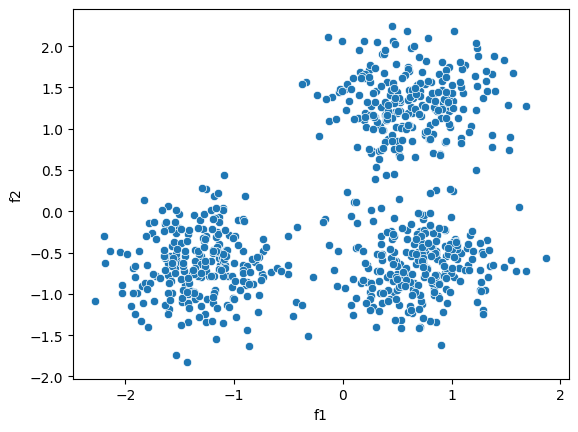

In [14]:
sns.scatterplot(df, x="f1", y='f2')
plt.show()

In [15]:
from sklearn.cluster import DBSCAN

ds = DBSCAN(eps=0.3, min_samples=10)
ds.fit(df[["f1", "f2"]])
df['cluster'] = ds.labels_
df.head()

,f1,f2,cluster
0,0.494261,1.451067,0
1,-1.428081,-0.837064,1
2,0.338559,1.038759,0
3,0.119001,-1.053976,2
4,1.122425,1.774937,0


In [17]:
df.cluster.value_counts()

cluster
 2    245
 1    244
 0    243
-1     18
Name: count, dtype: int64

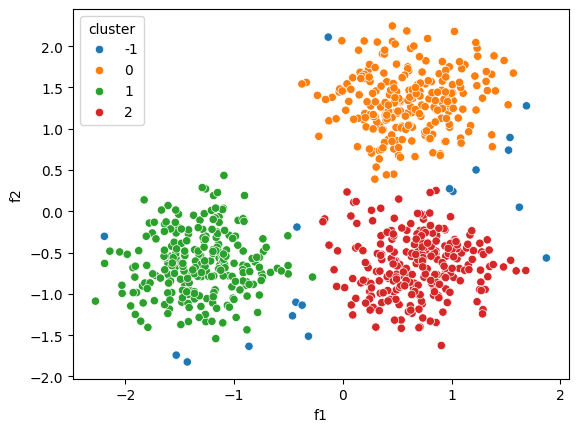

In [18]:
sns.scatterplot(df, x="f1", y='f2', palette="tab10", hue="cluster")
plt.show()